Do `Kernel -> Restart & Run All` in top menu to run the notebook

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.signal import freqs_zpk, zpk2tf
from ipywidgets import widgets
from numpy import pi

In [3]:
# compute transfer function from zeros and poles
def transfer_func(s, n, p):
    nom = 1
    for i in range(n.shape[0]):
        nom *= (s-n[i])
    denom = 1
    for i in range(p.shape[0]):
        denom *= (s-p[i])
    return nom / denom

In [4]:
# prepare x (real) and y (imaginary) axis 
# for plotting the transfer function
x = np.arange(-0.5, 0.5, 0.01)
y = np.arange(-0.5, 0.5, 0.01)
X,Y = np.meshgrid(x,y)

## Transfer function from zeros and poles

In [5]:
# create the transfer function from zeros and poles
n = np.array([0])
p = np.array([-0.2])

tr_f = transfer_func(X + 1j*Y, n, p)

<IPython.core.display.Javascript object>


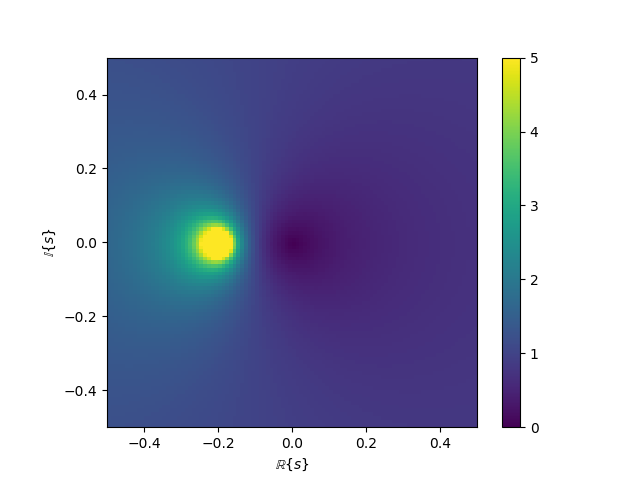

In [6]:
# plot the magnitude of the transfer function as a heatmap
fig = plt.figure()
f = plt.imshow(np.minimum(np.abs(tr_f),5), interpolation='none', extent=[-0.5,0.5,-0.5,0.5])
plt.colorbar()
cmap = f.get_cmap()

plt.gca().set_xlabel('$\mathbb{R}\{s\}$')
plt.gca().set_ylabel('$\mathbb{I}\{s\}$')

im = np.linspace(-0.5,0.5,1000)

plt.show()

<IPython.core.display.Javascript object>


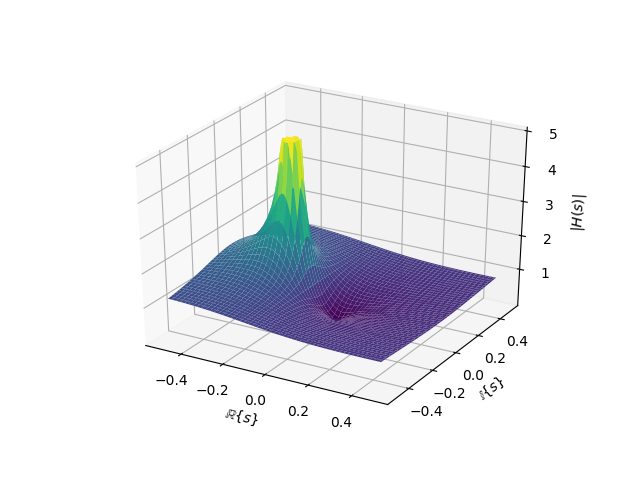

In [7]:
# plot the magnitude of the transfer function as a 3D graph
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1, projection='3d')
ax1.plot_surface(X, Y, np.minimum(np.abs(tr_f),5), cmap=cmap)
ax1.set_xlabel('$\mathbb{R}\{s\}$')
ax1.set_ylabel('$\mathbb{I}\{s\}$')
ax1.set_zlabel('$|H(s)|$')

tr_f_imag = transfer_func(np.zeros(im.shape) + 1j* im, n, p)

## Frequency response from transfer function

<IPython.core.display.Javascript object>


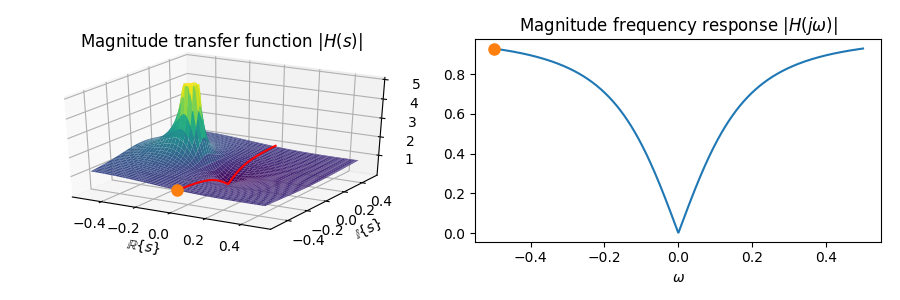

In [8]:
fig = plt.figure(figsize=(9,3))

# plot of transfer function
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, np.minimum(np.abs(tr_f),5), cmap=cmap)
tr_f_imag = transfer_func(np.zeros(im.shape) + 1j* im, n, p)
ax1.plot(np.zeros(im.shape) , im, np.minimum(np.abs(tr_f_imag),5), color='red')
ax1.set_xlabel('$\mathbb{R}\{s\}$')
ax1.set_ylabel('$\mathbb{I}\{s\}$')
ax1.set_title('Magnitude transfer function $|H(s)|$')

# plot of frequency response
w,h = freqs_zpk(n,p,1,im)
h = np.abs(h)
ax2 = fig.add_subplot(1,2,2)
ax2.plot(w,np.abs(h))
ax2.set_xlabel('$\omega$')
ax2.set_title('Magnitude frequency response $|H(j\omega)|$')

# get the moving orange dot
point_plot, = ax1.plot([0],[im[0]],[np.minimum(np.abs(tr_f_imag),5)[0]],'o', markersize=8)
point_plot2, = ax2.plot([im[0]],[h[0]],'o',markersize=8)

def plot_point(i=0):
    point_plot.set_data([0], [im[i]])
    point_plot.set_3d_properties([np.minimum(np.abs(tr_f_imag),5)[i]])
    point_plot2.set_data([im[i]],[h[i]])
    plt.draw()

widgets.interact(plot_point, 
                 i = (0, im.shape[0]-1, 1))

plt.tight_layout()
plt.show()